###  Загрузка данных проекта в среду разработки

In [24]:
# Загружаем датасет, знакомимся.
import numpy as np
import pandas as pd
train = pd.read_csv('train.csv', index_col='id')
test = pd.read_csv('test.csv', index_col='id')
print(train)

       Marital status  Application mode  Application order  Course  \
id                                                                   
0                   1                 1                  1    9238   
1                   1                17                  1    9238   
2                   1                17                  2    9254   
3                   1                 1                  3    9500   
4                   1                 1                  2    9500   
...               ...               ...                ...     ...   
76513               1                17                  1    9254   
76514               1                 1                  6    9254   
76515               5                17                  1    9085   
76516               1                 1                  3    9070   
76517               1                 1                  1    9773   

       Daytime/evening attendance  Previous qualification  \
id                          

###  Проверка сета данных на пропуски

In [26]:
# Проверка на пропуски
train.isna().sum().sort_values(ascending=False)

Marital status                                    0
Age at enrollment                                 0
Curricular units 1st sem (credited)               0
Curricular units 1st sem (enrolled)               0
Curricular units 1st sem (evaluations)            0
Curricular units 1st sem (approved)               0
Curricular units 1st sem (grade)                  0
Curricular units 1st sem (without evaluations)    0
Curricular units 2nd sem (credited)               0
Curricular units 2nd sem (enrolled)               0
Curricular units 2nd sem (evaluations)            0
Curricular units 2nd sem (approved)               0
Curricular units 2nd sem (grade)                  0
Curricular units 2nd sem (without evaluations)    0
Unemployment rate                                 0
Inflation rate                                    0
GDP                                               0
International                                     0
Scholarship holder                                0
Application 

###  Проверка сета данных на дубликаты

In [28]:
# Проверяем, есть ли дубликаты
train.duplicated().sum()

0

###  Взгляд на общую информацию по датасету

In [18]:
# смотрим общую инфу по датасету
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76518 entries, 0 to 76517
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  76518 non-null  int64  
 1   Application mode                                76518 non-null  int64  
 2   Application order                               76518 non-null  int64  
 3   Course                                          76518 non-null  int64  
 4   Daytime/evening attendance                      76518 non-null  int64  
 5   Previous qualification                          76518 non-null  int64  
 6   Previous qualification (grade)                  76518 non-null  float64
 7   Nacionality                                     76518 non-null  int64  
 8   Mother's qualification                          76518 non-null  int64  
 9   Father's qualification                      

###  Пытаемся определить категориальные и числовые признаки

In [30]:
# Пытаемся определить, сколько категориальных и числовых признаков у нас есть.
# Подобрал поиском и анализом примерную величину уникальных значений столбцов, которая позволяет провести эту границу
import pandas as pd
train = pd.read_csv('train.csv', index_col='id')
cat_cols = [col for col in train.columns if train[col].nunique() <= 19]

num_cols = [col for col in train.columns if train[col].nunique() >= 20]

# Извлекаем и выводим уникальные значения для каждого категориального признака
for col in cat_cols:
    unique_values = train[col].unique()
    print(f"Уникальные значения в столбце категориальных признаков'{col}': {unique_values}")
    
# Извлекаем и выводим уникальные значения для каждого категориального признака
for col in num_cols:
    unique_values = train[col].unique()
    print(f"Уникальные значения в столбце числовых признаков'{col}': {unique_values}")

Уникальные значения в столбце категориальных признаков'Marital status': [1 2 4 3 5 6]
Уникальные значения в столбце категориальных признаков'Application order': [1 2 3 6 4 5 0 9]
Уникальные значения в столбце категориальных признаков'Course': [9238 9254 9500  171 9085 9773 9003 9853 9147 9670 8014 9119 9991 9130
 9556 9070   33  979   39]
Уникальные значения в столбце категориальных признаков'Daytime/evening attendance': [1 0]
Уникальные значения в столбце категориальных признаков'Nacionality': [  1  26  41  24   6 100  21  22  11 101   2 103 105  25  17  62 109  32]
Уникальные значения в столбце категориальных признаков'Displaced': [0 1]
Уникальные значения в столбце категориальных признаков'Educational special needs': [0 1]
Уникальные значения в столбце категориальных признаков'Debtor': [0 1]
Уникальные значения в столбце категориальных признаков'Tuition fees up to date': [1 0]
Уникальные значения в столбце категориальных признаков'Gender': [0 1]
Уникальные значения в столбце категор

###  Пытаемся определить категориальные и числовые признаки 2
Количество уникальных значений не оказалось тем показателем, который бы указывал однозначено на то, категориальный ли это признак или числовой.
Семантика тоже оказалась немаловажным признаком. Поэтому определили так:

In [54]:
import pandas as pd

# Категориальные признаки
categorical_columns = [
    "Marital status", "Application mode", "Application order", "Course",
    "Daytime/evening attendance", "Previous qualification", "Nacionality",
    "Mother's qualification", "Father's qualification", "Mother's occupation",
    "Father's occupation", "Displaced", "Educational special needs", "Debtor",
    "Tuition fees up to date", "Gender", "Scholarship holder", "International"
]
# числовые признаки
numerical_columns = [
    "Previous qualification (grade)", "Admission grade", "Age at enrollment",
    "Curricular units 1st sem (credited)", "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)", "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (grade)", "Curricular units 1st sem (without evaluations)",
    "Curricular units 2nd sem (credited)", "Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (evaluations)", "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (grade)", "Curricular units 2nd sem (without evaluations)",
    "Unemployment rate", "Inflation rate", "GDP"
]


print("Categorical Columns:")
for column in categorical_columns:
    print(column)

print("\n")

print("Numerical Columns:")
for column in numerical_columns:
    print(column)


Categorical Columns:
Marital status
Application mode
Application order
Course
Daytime/evening attendance
Previous qualification
Nacionality
Mother's qualification
Father's qualification
Mother's occupation
Father's occupation
Displaced
Educational special needs
Debtor
Tuition fees up to date
Gender
Scholarship holder
International


Numerical Columns:
Previous qualification (grade)
Admission grade
Age at enrollment
Curricular units 1st sem (credited)
Curricular units 1st sem (enrolled)
Curricular units 1st sem (evaluations)
Curricular units 1st sem (approved)
Curricular units 1st sem (grade)
Curricular units 1st sem (without evaluations)
Curricular units 2nd sem (credited)
Curricular units 2nd sem (enrolled)
Curricular units 2nd sem (evaluations)
Curricular units 2nd sem (approved)
Curricular units 2nd sem (grade)
Curricular units 2nd sem (without evaluations)
Unemployment rate
Inflation rate
GDP


###  Кодировка Target c использованием LabelEncoder

In [32]:
from sklearn.preprocessing import LabelEncoder

# Используем LabelEncoder для кодирования уникальных значений
le = LabelEncoder()
train['Target'] = le.fit_transform(train['Target'])

# Находим уникальные значения и сортируем их по порядку
unique_values = sorted(zip(le.transform(le.classes_), le.classes_))

# Проверяем результат
print("Преобразованные значения 'Target':", train['Target'].unique())


Преобразованные значения 'Target': [2 0 1]


###  Применяем нормализацию к новому определенному списку числовых категорий numerical_columns

In [58]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

# Применяем нормализацию
train[numerical_columns] = scaler.fit_transform(train[numerical_columns])

# Проверяем результат
print(train.head())


    Marital status  Application mode  Application order  Course  \
id                                                                
0                1          0.000000                  1    9238   
1                1          0.307692                  1    9238   
2                1          0.307692                  2    9254   
3                1          0.000000                  3    9500   
4                1          0.000000                  2    9500   

    Daytime/evening attendance  Previous qualification  \
id                                                       
0                            1                     0.0   
1                            1                     0.0   
2                            1                     0.0   
3                            1                     0.0   
4                            1                     0.0   

    Previous qualification (grade)  Nacionality  Mother's qualification  \
id                                              

###  Применив RandomForestClassifier определяем часть важных признаков: как показал анализ, 20 признаков охватывают 90% от общей суммы "важности". Топ-15 давало, к примеру, 83%

Top 20 features based on importance:
                                   Feature  Importance
36         Curricular units approved_ratio    0.157522
30     Curricular units 2nd sem (approved)    0.115807
24     Curricular units 1st sem (approved)    0.089645
31        Curricular units 2nd sem (grade)    0.088888
25        Curricular units 1st sem (grade)    0.077155
29  Curricular units 2nd sem (evaluations)    0.040130
12                         Admission grade    0.037448
23  Curricular units 1st sem (evaluations)    0.037179
6           Previous qualification (grade)    0.031317
16                 Tuition fees up to date    0.029495
19                       Age at enrollment    0.028848
11                     Father's occupation    0.021921
3                                   Course    0.020940
37          Average parent's qualification    0.020813
18                      Scholarship holder    0.018039
10                     Mother's occupation    0.017826
33                       Une

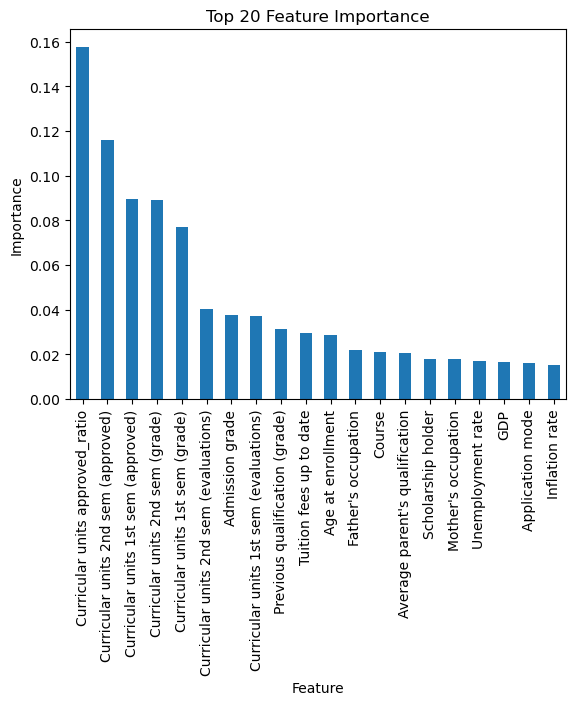

In [62]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


#train = pd.read_csv('train.csv', index_col='id')

# Target' — это целевая переменная
X = train.drop('Target', axis=1)  # Все столбцы, кроме целевой переменной
y = train['Target']  # Целевая переменная

# Обучаем модель случайного леса
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Получаем важность признаков
feature_importances = model.feature_importances_

# Создаем DataFrame для визуализации
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Сортируем признаки по важности
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Получаем топ-20 признаков
top_20_features = importance_df.head(20)

# Выводим топ-20 признаков
print("Top 20 features based on importance:")
print(top_20_features)

# Подсчитываем сумму важности топ-20 признаков
total_importance_top_20 = top_20_features['Importance'].sum()
print(f"\nСумма важности топ-20 признаков: {total_importance_top_20}")

# Визуализируем важность признаков
top_20_features.plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.title('Top 20 Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

###  Feature engeneering. Два новых признака пока достаточно, это средняя величина зачтенных экзаменов за два семестра и средний уровень квалификации родителей.

In [45]:
train["Curricular units approved_ratio"] = (
    (train["Curricular units 1st sem (approved)"]) + (train["Curricular units 2nd sem (approved)"] )
) / 2

# Добавляем новый признак "Average parent's qualification"
train["Average parent's qualification"] = (
    train["Mother's qualification"] + train["Father's qualification"]
) / 2

# Проверяем добавленные признаки
print(train[["Curricular units approved_ratio", "Average parent's qualification"]].head())

    Curricular units approved_ratio  Average parent's qualification
id                                                                 
0                          0.265385                        0.209302
1                          0.076923                        0.418605
2                          0.000000                        0.232558
3                          0.309615                        0.232558
4                          0.265385                        0.627907
